# **Final Project - Morphological Galaxy Classification with Transfer Learning**
Savanna Guertin, 219448412      
Andrew Pascual,  219494575     
CSC 180-01  
May 3, 2021

# Importing and Examining the Dataset
1. Galaxy10 dataset classification labels come from Galaxy Zoo: zooniverse.org/projects/zookeeper/galaxy-zoo/
2. Galaxy10 dataset images come from Sloan Digital Sky Survey


Galaxy10 is a dataset contains 21785, 69x69 pixels colored galaxy images (g, r and i band) separated in 10 classes. Galaxy10 images come from Sloan Digital Sky Survey and labels come from Galaxy Zoo. The dataset has columns: images with shape (25753, 69, 69, 3), ans, ra, dec, redshift, and pxscale (unit of arcsecond per pixel).

In [1]:
!pip install astroNN

C:\Users\savan\.astroNN\datasets\Galaxy10.h5 was found!
===================Data Inspection===================


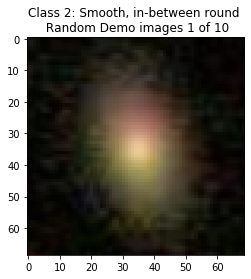

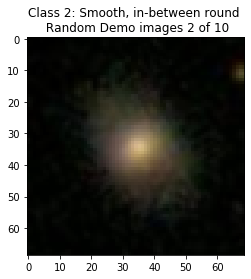

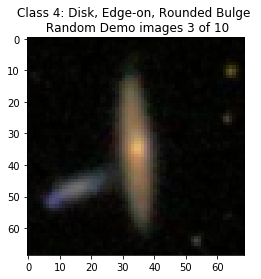

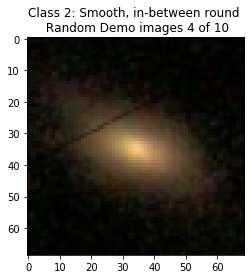

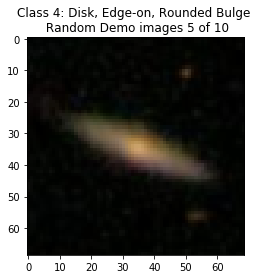

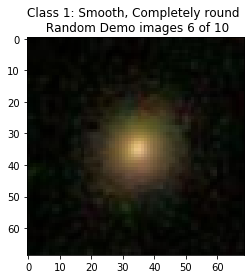

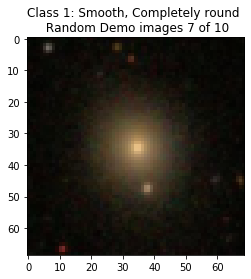

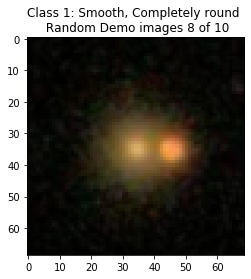

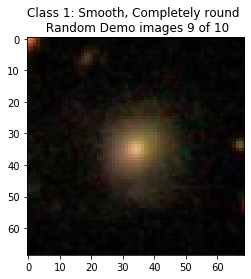

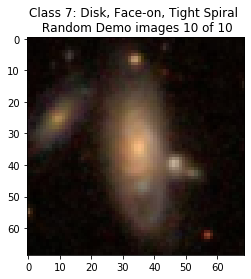

===============Data Inspection Finished===============


In [41]:
# import everything we need first
from tensorflow.keras import utils
import numpy as np
from sklearn.model_selection import train_test_split
import pylab as plt
from astroNN.datasets import load_galaxy10
from astroNN.datasets.galaxy10 import galaxy10cls_lookup

# code from: https://astronn.readthedocs.io/en/latest/galaxy10.html
# Authors: Henry Leung, Department of Astronomy & Astrophysic, University of Toronto
#          Jo Bovy, Department of Astronomy & Astrophysic, University of Toronto

# To load images and labels
images, labels = load_galaxy10()

# To convert the labels to categorical 10 classes
labels = utils.to_categorical(labels, 10)

# Select 10 of the images to inspect
img = None
plt.ion()
print('===================Data Inspection===================')
for counter, i in enumerate(range(np.random.randint(0, labels.shape[0], size=10).shape[0])):
    img = plt.imshow(images[i])
    plt.title('Class {}: {} \n Random Demo images {} of 10'.format(np.argmax(labels[i]), galaxy10cls_lookup(labels[i]), counter+1))
    plt.draw()
    plt.pause(2.)
plt.close('all')
print('===============Data Inspection Finished===============')


# converting to desirable type
labels = labels.astype(np.float32)
images = images.astype(np.float32)

In [3]:
# double checking shapes
print(images.shape)
print(labels.shape)

(21785, 69, 69, 3)
(21785, 10)


In [60]:
from astroNN.datasets.galaxy10 import galaxy10cls_lookup

galaxy10cls_lookup(5) # put a class number to get back the name

'Disk, Edge-on, Boxy Bulge'

# Splitting into train and test set

In [42]:
from sklearn.model_selection  import train_test_split
import numpy as np

train_idx, test_idx = train_test_split(np.arange(labels.shape[0]), test_size=0.1)
train_images, train_labels, test_images, test_labels = images[train_idx], labels[train_idx], images[test_idx], labels[test_idx]

### **From this point, all code is original**

# CNN without Transfer Learning

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D


model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=train_images.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation="softmax")) #10 classes

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 69, 69, 32)        896       
_________________________________________________________________
activation_70 (Activation)   (None, 69, 69, 32)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 34, 34, 32)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
activation_71 (Activation)   (None, 34, 34, 64)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 17, 17, 64)       

In [57]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy']) #categorical due to more than 2 classes
batch_size = 128 

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=4, verbose=2, mode='auto')

model.fit(train_images[0:10000], train_labels[0:10000],    
          batch_size=batch_size,
          epochs=20,
          verbose=2,
          validation_data=(test_images, test_labels),
          callbacks=[monitor])

Train on 10000 samples, validate on 2179 samples
Epoch 1/20
10000/10000 - 29s - loss: 15.0565 - acc: 0.3117 - val_loss: 1.7875 - val_acc: 0.3378
Epoch 2/20
10000/10000 - 29s - loss: 1.5589 - acc: 0.3914 - val_loss: 1.5922 - val_acc: 0.3722
Epoch 3/20
10000/10000 - 28s - loss: 1.4365 - acc: 0.4153 - val_loss: 1.5516 - val_acc: 0.3782
Epoch 4/20
10000/10000 - 28s - loss: 1.3368 - acc: 0.4494 - val_loss: 1.4902 - val_acc: 0.3864
Epoch 5/20
10000/10000 - 28s - loss: 1.2766 - acc: 0.4734 - val_loss: 1.4673 - val_acc: 0.3928
Epoch 6/20
10000/10000 - 29s - loss: 1.2042 - acc: 0.4988 - val_loss: 1.4163 - val_acc: 0.4199
Epoch 7/20
10000/10000 - 29s - loss: 1.1462 - acc: 0.5307 - val_loss: 1.3655 - val_acc: 0.4456
Epoch 8/20
10000/10000 - 30s - loss: 1.0907 - acc: 0.5573 - val_loss: 1.3332 - val_acc: 0.4644
Epoch 9/20
10000/10000 - 28s - loss: 1.0333 - acc: 0.5812 - val_loss: 1.3544 - val_acc: 0.4654
Epoch 10/20
10000/10000 - 28s - loss: 0.9726 - acc: 0.6091 - val_loss: 1.3553 - val_acc: 0.4800

## Metrics

In [58]:
from sklearn import metrics

labels_true = np.argmax(test_labels,axis=1)
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)


score = metrics.accuracy_score(labels_true, pred)
print('Accuracy: {}'.format(score))


f1 = metrics.f1_score(labels_true, pred, average='weighted')
print('Averaged F1: {}'.format(f1))

           
print(metrics.classification_report(labels_true, pred))

Accuracy: 0.5745754933455713
Averaged F1: 0.5506880802400606
              precision    recall  f1-score   support

           0       0.39      0.27      0.32       356
           1       0.63      0.83      0.72       662
           2       0.60      0.60      0.60       621
           3       0.18      0.07      0.10        29
           4       0.67      0.70      0.68       165
           6       0.80      0.65      0.72        69
           7       0.38      0.48      0.42       122
           8       0.24      0.09      0.13       101
           9       0.46      0.11      0.18        54

    accuracy                           0.57      2179
   macro avg       0.48      0.42      0.43      2179
weighted avg       0.55      0.57      0.55      2179



## Confusion Matrix

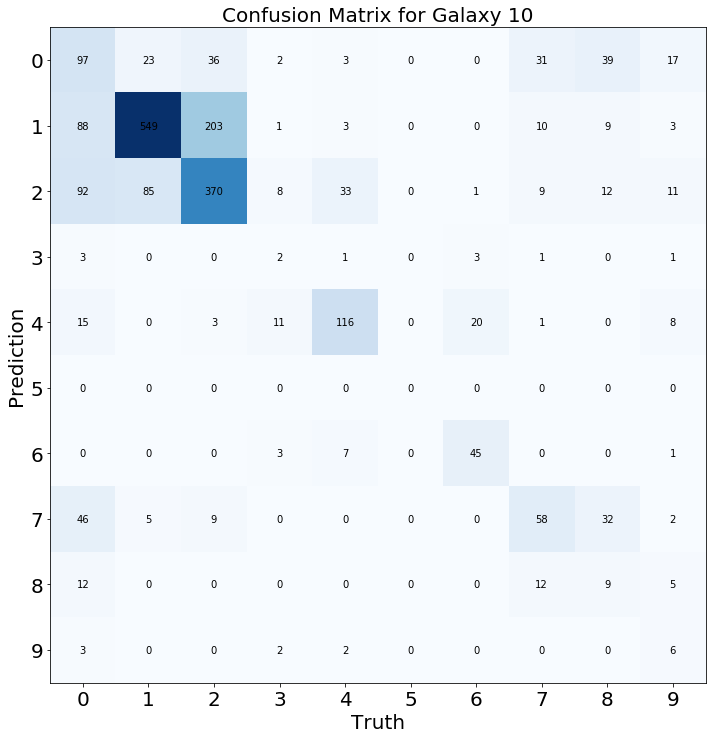

In [59]:
from astroNN.datasets.galaxy10 import galaxy10_confusion
from sklearn.metrics import confusion_matrix, classification_report

# Prepare a confusion matrix
confusion_matrix = np.zeros((10,10))

# create the confusion matrix
for counter, i in enumerate(pred):
    confusion_matrix[i, labels_true[counter]] += 1

# code modified from galaxy10_confusion(): https://github.com/henrysky/astroNN/blob/master/astroNN/datasets/galaxy10.py
def plot_confusion_matrix(confusion_mat):
  conf_arr = confusion_mat.astype(int)

  norm_conf = []
  a = np.max(conf_arr)
  for i in conf_arr:
      tmp_arr = []
      for j in i:
          tmp_arr.append(float(j) / float(a))
      norm_conf.append(tmp_arr)

  fig = plt.figure(figsize=(10, 10.5))
  ax = fig.gca()
  ax.set_title("Confusion Matrix for Galaxy 10", fontsize=20)
  ax.set_aspect(1)
  ax.imshow(np.array(norm_conf), cmap=plt.get_cmap('Blues'), interpolation='nearest')

  width, height = conf_arr.shape

  for x in range(width):
      for y in range(height):
          ax.annotate(str(conf_arr[x][y]), xy=(y, x),
                      horizontalalignment='center',
                      verticalalignment='center')

  ax.set_xticks(np.arange(width))
  ax.set_xticklabels([str(i) for i in range(width)], fontsize=20)
  ax.set_yticks(np.arange(height))
  ax.set_yticklabels([str(i) for i in range(width)], fontsize=20)
  ax.set_ylabel('Prediction', fontsize=20)
  ax.set_xlabel('Truth', fontsize=20)
  fig.tight_layout()


# Plot the confusion matrix
plot_confusion_matrix(confusion_matrix)

# Transfer Learning with VGG16

In [6]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(69, 69, 3))   #  first hidden layer


model = Sequential()

for layer in vgg_model.layers:
  model.add(layer)


# print out the model summary
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
58892288/58889256 [==============================] - 23s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 69, 69, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 69, 69, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 34, 34, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 34, 34, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 34, 34, 128)       147584    
_________________________________________________________________
bloc

In [7]:
# freeze the weights
for layer in model.layers:
  layer.trainable = False

In [8]:
model.add(Flatten())


# Add some "Dense" layers here, including output layer
model.add(Dense(512))
model.add(Dense(64))
model.add(Dense(32))
model.add(Dense(10, activation="softmax")) #10 classes

In [11]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy']) #categorical due to more than 2 classes
batch_size = 128 

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=4, verbose=2, mode='auto')

model.fit(train_images[0:10000], train_labels[0:10000],    
          batch_size=batch_size,
          epochs=10,
          verbose=2,
          validation_data=(test_images, test_labels),
          callbacks=[monitor])

Train on 10000 samples, validate on 2179 samples
Epoch 1/10
10000/10000 - 127s - loss: 2.1902 - acc: 0.6165 - val_loss: 1.3514 - val_acc: 0.6765
Epoch 2/10
10000/10000 - 127s - loss: 0.9707 - acc: 0.7016 - val_loss: 1.4837 - val_acc: 0.5447
Epoch 3/10
10000/10000 - 122s - loss: 0.8415 - acc: 0.7057 - val_loss: 1.1219 - val_acc: 0.6677
Epoch 4/10
10000/10000 - 122s - loss: 0.7846 - acc: 0.7173 - val_loss: 1.1770 - val_acc: 0.6700
Epoch 5/10
10000/10000 - 121s - loss: 0.6932 - acc: 0.7414 - val_loss: 1.1344 - val_acc: 0.6783
Epoch 6/10
10000/10000 - 122s - loss: 0.6665 - acc: 0.7515 - val_loss: 0.9889 - val_acc: 0.6911
Epoch 7/10
10000/10000 - 129s - loss: 0.6258 - acc: 0.7636 - val_loss: 1.0982 - val_acc: 0.6746
Epoch 8/10
10000/10000 - 125s - loss: 0.6728 - acc: 0.7558 - val_loss: 1.0402 - val_acc: 0.6714
Epoch 9/10
10000/10000 - 125s - loss: 0.6365 - acc: 0.7577 - val_loss: 1.0725 - val_acc: 0.6609
Epoch 10/10
10000/10000 - 121s - loss: 0.6069 - acc: 0.7639 - val_loss: 1.0461 - val_ac

## Metrics

In [14]:
from sklearn import metrics

labels_true = np.argmax(test_labels,axis=1)
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)


score = metrics.accuracy_score(labels_true, pred)
print('Accuracy: {}'.format(score))


f1 = metrics.f1_score(labels_true, pred, average='weighted')
print('Averaged F1: {}'.format(f1))

           
print(metrics.classification_report(labels_true, pred))

Accuracy: 0.6727856815052776
Averaged F1: 0.6622816159311162
              precision    recall  f1-score   support

           0       0.48      0.51      0.49       341
           1       0.69      0.94      0.80       690
           2       0.81      0.57      0.67       637
           3       0.43      0.34      0.38        38
           4       0.81      0.83      0.82       159
           5       0.00      0.00      0.00         2
           6       0.65      0.52      0.58        62
           7       0.63      0.36      0.46       109
           8       0.52      0.47      0.49        94
           9       0.61      0.43      0.50        47

    accuracy                           0.67      2179
   macro avg       0.56      0.50      0.52      2179
weighted avg       0.68      0.67      0.66      2179



## Confusion Matrix

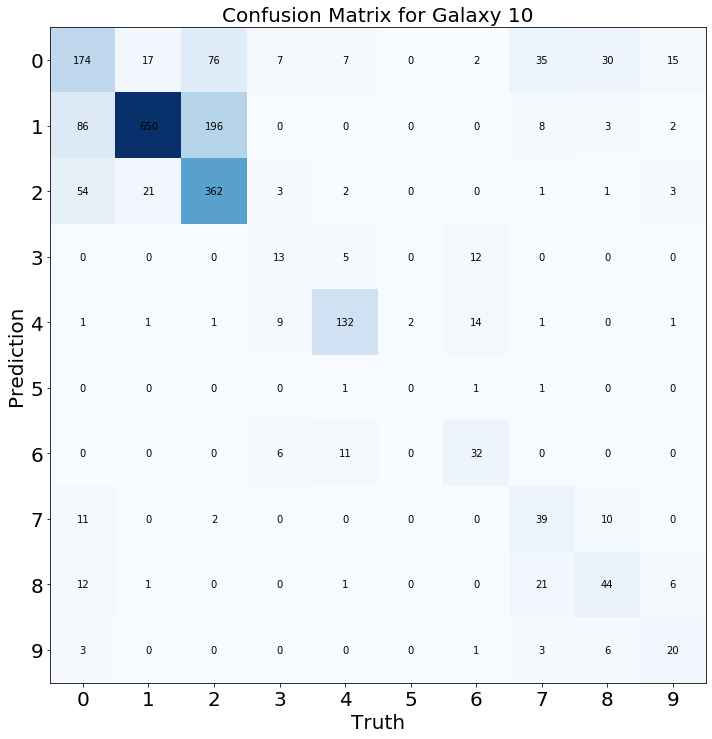

In [15]:
from astroNN.datasets.galaxy10 import galaxy10_confusion
from sklearn.metrics import confusion_matrix, classification_report

# Prepare a confusion matrix
confusion_matrix = np.zeros((10,10))

# create the confusion matrix
for counter, i in enumerate(pred):
    confusion_matrix[i, labels_true[counter]] += 1

# code modified from galaxy10_confusion(): https://github.com/henrysky/astroNN/blob/master/astroNN/datasets/galaxy10.py
def plot_confusion_matrix(confusion_mat):
  conf_arr = confusion_mat.astype(int)

  norm_conf = []
  a = np.max(conf_arr)
  for i in conf_arr:
      tmp_arr = []
      for j in i:
          tmp_arr.append(float(j) / float(a))
      norm_conf.append(tmp_arr)

  fig = plt.figure(figsize=(10, 10.5))
  ax = fig.gca()
  ax.set_title("Confusion Matrix for Galaxy 10", fontsize=20)
  ax.set_aspect(1)
  ax.imshow(np.array(norm_conf), cmap=plt.get_cmap('Blues'), interpolation='nearest')

  width, height = conf_arr.shape

  for x in range(width):
      for y in range(height):
          ax.annotate(str(conf_arr[x][y]), xy=(y, x),
                      horizontalalignment='center',
                      verticalalignment='center')

  ax.set_xticks(np.arange(width))
  ax.set_xticklabels([str(i) for i in range(width)], fontsize=20)
  ax.set_yticks(np.arange(height))
  ax.set_yticklabels([str(i) for i in range(width)], fontsize=20)
  ax.set_ylabel('Prediction', fontsize=20)
  ax.set_xlabel('Truth', fontsize=20)
  fig.tight_layout()


# Plot the confusion matrix
plot_confusion_matrix(confusion_matrix)

# Transfer Learning with VGG19

In [25]:
from tensorflow.keras.applications.vgg19 import VGG19
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# need to have a sequential model
vgg19_model = VGG19(weights='imagenet', include_top=False, input_shape=(69, 69, 3))   #  first hidden layer


model = Sequential()

for layer in vgg19_model.layers:
  model.add(layer)


# print out the model summary
model.summary()

80142336/80134624 [==============================] - 30s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 69, 69, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 69, 69, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 34, 34, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 34, 34, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 34, 34, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 17, 17, 128)       0         
______________________________________________________

In [26]:
# freeze the weights
for layer in model.layers:
  layer.trainable = False

In [27]:
model.add(Flatten())


# Add some "Dense" layers here, including output layer
model.add(Dense(1024))
model.add(Dense(512))
model.add(Dense(64))
model.add(Dense(32))
model.add(Dense(10, activation="softmax")) #10 classes

In [28]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy']) #categorical due to more than 2 classes
batch_size = 128 

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=4, verbose=2, mode='auto')

model.fit(train_images[0:10000], train_labels[0:10000],    
          batch_size=batch_size,
          epochs=10,
          verbose=2,
          validation_data=(test_images, test_labels),
          callbacks=[monitor])

Train on 10000 samples, validate on 2179 samples
Epoch 1/10
10000/10000 - 152s - loss: 10.9967 - acc: 0.5115 - val_loss: 2.5994 - val_acc: 0.5971
Epoch 2/10
10000/10000 - 152s - loss: 1.8219 - acc: 0.6122 - val_loss: 1.7559 - val_acc: 0.5929
Epoch 3/10
10000/10000 - 152s - loss: 1.2385 - acc: 0.6377 - val_loss: 1.6137 - val_acc: 0.5948
Epoch 4/10
10000/10000 - 150s - loss: 1.0165 - acc: 0.6683 - val_loss: 1.4335 - val_acc: 0.6200
Epoch 5/10
10000/10000 - 152s - loss: 0.9713 - acc: 0.6720 - val_loss: 1.4432 - val_acc: 0.6191
Epoch 6/10
10000/10000 - 146s - loss: 0.9233 - acc: 0.6761 - val_loss: 1.5116 - val_acc: 0.6333
Epoch 7/10
10000/10000 - 143s - loss: 0.8531 - acc: 0.6837 - val_loss: 1.4297 - val_acc: 0.5805
Epoch 8/10
10000/10000 - 148s - loss: 0.8421 - acc: 0.6952 - val_loss: 1.2654 - val_acc: 0.6352
Epoch 9/10
10000/10000 - 154s - loss: 0.7589 - acc: 0.7121 - val_loss: 1.2673 - val_acc: 0.6420
Epoch 10/10
10000/10000 - 149s - loss: 0.7489 - acc: 0.7079 - val_loss: 1.3383 - val_a

## Metrics

In [29]:
from sklearn import metrics

labels_true = np.argmax(test_labels,axis=1)
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)


score = metrics.accuracy_score(labels_true, pred)
print('Accuracy: {}'.format(score))


f1 = metrics.f1_score(labels_true, pred, average='weighted')
print('Averaged F1: {}'.format(f1))

           
print(metrics.classification_report(labels_true, pred))

Accuracy: 0.6310234052317577
Averaged F1: 0.6167609482488682
              precision    recall  f1-score   support

           0       0.47      0.57      0.51       341
           1       0.65      0.91      0.76       690
           2       0.78      0.46      0.58       637
           3       0.42      0.45      0.44        38
           4       0.73      0.78      0.75       159
           5       0.00      0.00      0.00         2
           6       0.78      0.52      0.62        62
           7       0.56      0.42      0.48       109
           8       0.54      0.22      0.32        94
           9       0.37      0.40      0.39        47

    accuracy                           0.63      2179
   macro avg       0.53      0.47      0.48      2179
weighted avg       0.65      0.63      0.62      2179



## Confusion Matrix

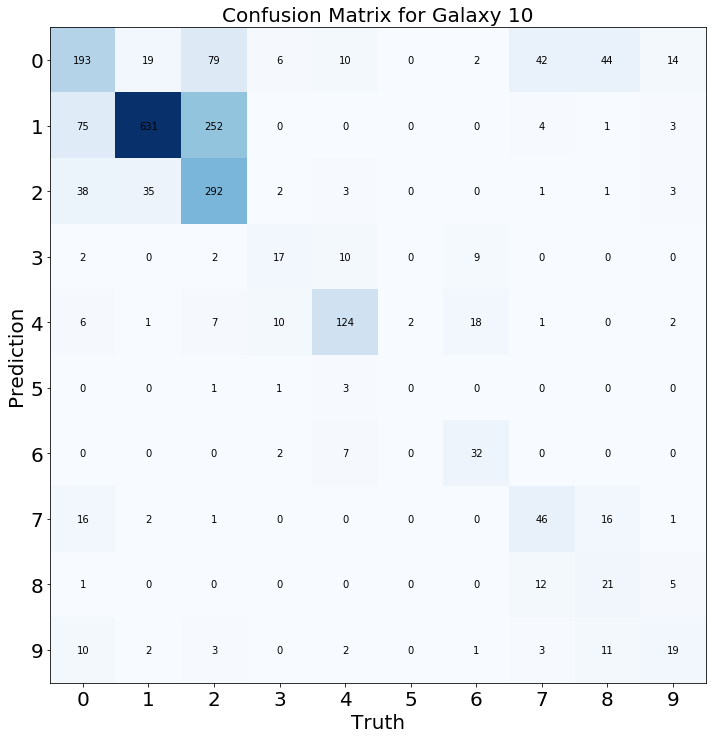

In [30]:
from astroNN.datasets.galaxy10 import galaxy10_confusion
from sklearn.metrics import confusion_matrix, classification_report

# Prepare a confusion matrix
confusion_matrix = np.zeros((10,10))

# create the confusion matrix
for counter, i in enumerate(pred):
    confusion_matrix[i, labels_true[counter]] += 1

# code modified from galaxy10_confusion(): https://github.com/henrysky/astroNN/blob/master/astroNN/datasets/galaxy10.py
def plot_confusion_matrix(confusion_mat):
  conf_arr = confusion_mat.astype(int)

  norm_conf = []
  a = np.max(conf_arr)
  for i in conf_arr:
      tmp_arr = []
      for j in i:
          tmp_arr.append(float(j) / float(a))
      norm_conf.append(tmp_arr)

  fig = plt.figure(figsize=(10, 10.5))
  ax = fig.gca()
  ax.set_title("Confusion Matrix for Galaxy 10", fontsize=20)
  ax.set_aspect(1)
  ax.imshow(np.array(norm_conf), cmap=plt.get_cmap('Blues'), interpolation='nearest')

  width, height = conf_arr.shape

  for x in range(width):
      for y in range(height):
          ax.annotate(str(conf_arr[x][y]), xy=(y, x),
                      horizontalalignment='center',
                      verticalalignment='center')

  ax.set_xticks(np.arange(width))
  ax.set_xticklabels([str(i) for i in range(width)], fontsize=20)
  ax.set_yticks(np.arange(height))
  ax.set_yticklabels([str(i) for i in range(width)], fontsize=20)
  ax.set_ylabel('Prediction', fontsize=20)
  ax.set_xlabel('Truth', fontsize=20)
  fig.tight_layout()


# Plot the confusion matrix
plot_confusion_matrix(confusion_matrix)

# Transfer Learning with ResNet50

In [21]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization

height = 69 #dimensions of image
width = 69
channel = 3 #RGB

# Create pre-trained ResNet152 without top layer
model_resnet = ResNet50(include_top=False, weights="imagenet", input_shape=(height, width, channel))


# add module of our model as follows, and use output of ResNet to input of the next layer
conv1 = Conv2D(32, (3,3), activation = 'relu', padding='same')(model_resnet.output)
pool1 = MaxPooling2D(2,2)(conv1)
bn1 = BatchNormalization(axis=3)(pool1)
drop1 = Dropout(0.2)(bn1)

flatten1 = Flatten()(drop1)
fc2 = Dense(10, activation='softmax')(flatten1)

# our final model
model = Model(inputs=model_resnet.input, outputs=fc2)

model.summary()

C:\Users\savan\anaconda3\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 35s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 69, 69, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 75, 75, 3)    0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 35, 35, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 35, 35, 64)   256         conv1[0][0]                      
____________________________

In [22]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy']) #categorical due to more than 2 classes
batch_size = 128 

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=4, verbose=2, mode='auto')

# have to use less training data or this would take forever
model.fit(train_images[0:10000], train_labels[0:10000],    
          batch_size=batch_size,
          epochs=10,
          verbose=2,
          validation_data=(test_images, test_labels),
          callbacks=[monitor])

Train on 10000 samples, validate on 2179 samples
Epoch 1/10
10000/10000 - 1022s - loss: 1.1299 - acc: 0.6521 - val_loss: 7.4635 - val_acc: 0.2148
Epoch 2/10
10000/10000 - 1046s - loss: 0.6537 - acc: 0.7853 - val_loss: 2.0338 - val_acc: 0.5819
Epoch 3/10
10000/10000 - 1024s - loss: 0.5102 - acc: 0.8337 - val_loss: 1.3031 - val_acc: 0.6544
Epoch 4/10
10000/10000 - 1023s - loss: 0.4385 - acc: 0.8548 - val_loss: 1.2682 - val_acc: 0.7334
Epoch 5/10
10000/10000 - 1043s - loss: 0.3515 - acc: 0.8861 - val_loss: 0.7413 - val_acc: 0.7728
Epoch 6/10
10000/10000 - 1027s - loss: 0.2818 - acc: 0.9094 - val_loss: 1.2222 - val_acc: 0.6751
Epoch 7/10
10000/10000 - 975s - loss: 0.2429 - acc: 0.9213 - val_loss: 1.1673 - val_acc: 0.6944
Epoch 8/10
10000/10000 - 964s - loss: 0.2215 - acc: 0.9272 - val_loss: 1.2508 - val_acc: 0.6820
Epoch 9/10
10000/10000 - 975s - loss: 0.1628 - acc: 0.9483 - val_loss: 1.2417 - val_acc: 0.6595
Epoch 00009: early stopping


## Metrics

In [23]:
from sklearn import metrics

labels_true = np.argmax(test_labels,axis=1)
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)


score = metrics.accuracy_score(labels_true, pred)
print('Accuracy: {}'.format(score))


f1 = metrics.f1_score(labels_true, pred, average='weighted')
print('Averaged F1: {}'.format(f1))

           
print(metrics.classification_report(labels_true, pred))

Accuracy: 0.6594768242312987
Averaged F1: 0.6388435437750853
              precision    recall  f1-score   support

           0       0.42      0.78      0.55       341
           1       0.76      0.93      0.84       690
           2       0.96      0.34      0.50       637
           3       0.89      0.21      0.34        38
           4       0.77      0.88      0.82       159
           5       0.00      0.00      0.00         2
           6       0.68      0.92      0.78        62
           7       0.73      0.38      0.50       109
           8       0.46      0.41      0.44        94
           9       0.44      0.57      0.50        47

    accuracy                           0.66      2179
   macro avg       0.61      0.54      0.53      2179
weighted avg       0.74      0.66      0.64      2179



C:\Users\savan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Confusion Matrix

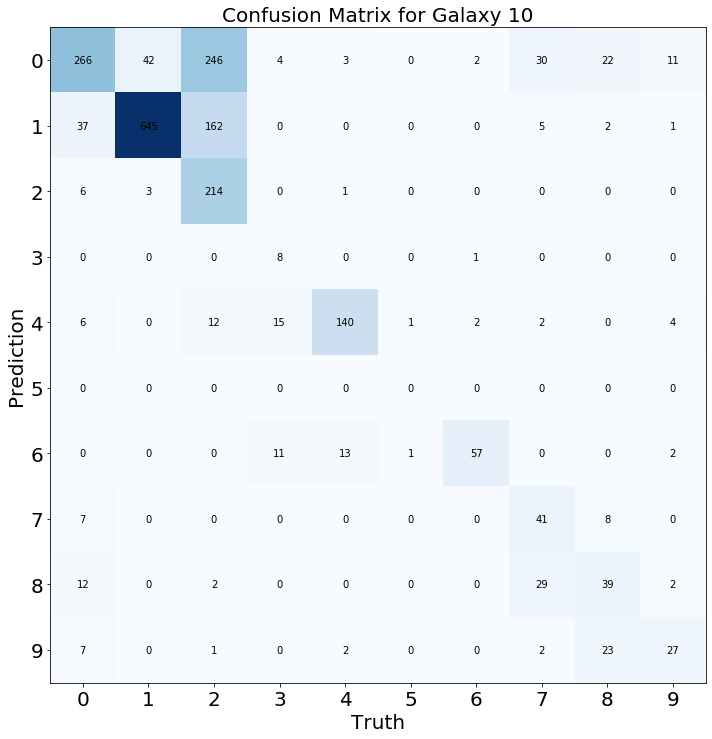

In [24]:
from astroNN.datasets.galaxy10 import galaxy10_confusion
from sklearn.metrics import confusion_matrix, classification_report

# Prepare a confusion matrix
confusion_matrix = np.zeros((10,10))

# create the confusion matrix
for counter, i in enumerate(pred):
    confusion_matrix[i, labels_true[counter]] += 1

# code modified from galaxy10_confusion(): https://github.com/henrysky/astroNN/blob/master/astroNN/datasets/galaxy10.py
def plot_confusion_matrix(confusion_mat):
  conf_arr = confusion_mat.astype(int)

  norm_conf = []
  a = np.max(conf_arr)
  for i in conf_arr:
      tmp_arr = []
      for j in i:
          tmp_arr.append(float(j) / float(a))
      norm_conf.append(tmp_arr)

  fig = plt.figure(figsize=(10, 10.5))
  ax = fig.gca()
  ax.set_title("Confusion Matrix for Galaxy 10", fontsize=20)
  ax.set_aspect(1)
  ax.imshow(np.array(norm_conf), cmap=plt.get_cmap('Blues'), interpolation='nearest')

  width, height = conf_arr.shape

  for x in range(width):
      for y in range(height):
          ax.annotate(str(conf_arr[x][y]), xy=(y, x),
                      horizontalalignment='center',
                      verticalalignment='center')

  ax.set_xticks(np.arange(width))
  ax.set_xticklabels([str(i) for i in range(width)], fontsize=20)
  ax.set_yticks(np.arange(height))
  ax.set_yticklabels([str(i) for i in range(width)], fontsize=20)
  ax.set_ylabel('Prediction', fontsize=20)
  ax.set_xlabel('Truth', fontsize=20)
  fig.tight_layout()


# Plot the confusion matrix
plot_confusion_matrix(confusion_matrix)